## 26. Нелинейный метод наименьших квадратов. Светимость звезды
[Каханер–Моулер–Нэш]
Сверхновой звезде типа I соответствует специальная модель светимости. Спустя несколько дней после максимума светимости эту модель
можно описать так:
$$
L(t) = C_1 e^{-t/\alpha_1} + C_2 e^{-t/\alpha_2},
$$
где $t$ – время (в днях) с момента максимальной светимости,
а $L(t)$ – светимость, относительно максимальной светимости.
В таблице ниже приведены данные по относительной светимости для свехновой I939A6, полученные в 1936 г.
Пик светимости приходится на день $0$, но наблюдения до дня $7.0$, опущены, так какуказанная модель не описывает
светимости перед и непосредственно после максимума.


```
    t      L(t)    
--------------------
   7.0    0.6310     
   7.0    0.8318     
  14.8    0.2754     
  16.0    0.1445     
  16.9    0.2089     
  17.0    0.1585     
  18.8    0.1585     
  19.0    0.1318     
  20.9    0.1585     
  15.8    0.1096     
  16.8    0.1445     
  28.0    0.09120    
  53.0    0.06310    
  54.0    0.06918    
  57.0    0.05754    
  85.0    0.03631    
 109.0    0.02291    
 110.0    0.02291    
 141.0    0.01738    
 142.0    0.01585    
 168.0    0.009120   
```

Нанести данные на график.
Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики.
Используйте различные начальные значения для $\alpha_1$, $\alpha_2$, $C_1$, $C_2$.
Чему равна результирующая суммарная ошибка?
Насколько чувствительны результирующие значения к начальным значениям?

In [0]:
#Подключаем все необходимые для решения задачи библиотеки и функции
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [0]:
#Передаём исходные данные, указанные в условии
t = np.array([7.,7.,18.8,16.,16.9,17.,18.8,19.,20.9,15.8,16.8,28.0,53.,54.,57.,85.,109.,110.,141.,142.,168.])
Lt = np.array([0.6310, 0.8318, 0.2754, 0.1445, 0.2089, 0.1585, 0.1585, 0.1318, 0.1585, 0.1096, 0.1445, 0.09120, 0.06310, 0.06918, 0.05754, 0.03631, 0.02291, 0.02291, 0.01738, 0.01585, 0.009120])


Метод наименьших квадратов (далее будем обозначать МНК) - один из самых распространенных методов, который применяется при решении различных систем уравнений и нахождении аппроксимирующей прямой для заранее заданных точек.

##Как выглядит задача апроксимации по МНК в общей постановке? Обратимся к теории:

В более общей постановке задачи аппроксимации предполагают, что данные 
$$
(x_1, y_1),\, (x_2, y_2),\, \dots,\, (x_m, y_m)
$$
удовлетворяют соотношению
$$
y_i = f(x_i) + \mbox{ошибка} \qquad (i=1,2,\dots,m),
$$
где $f(x)$ - некоторая функция, называемая *модельной функцией* или *моделью*.
Иными словами,
$$
y_i \approx f(x_i) \qquad (i=1,2,\dots,m). \tag{*}
$$

Часто модель ищут в виде 
$$
f(x) = \beta_1 f_1(x) + \beta_2 f_2(x) + \dots + \beta_n f_n(x), \tag{**}
$$
где $f_1(x),f_2(x),\dots,f_n(x)$ - некоторые заданные функции.
Например, при аппроксимации данных линейной функцией (как было выше) $f_1(x) = 1$, $f_2(x)=x$. 
В более общем случае рассматривают аппроксимацию полиномами (многочленами), тогда
$f_1(x) = 1,\, f_2(x)=x\, \dots,\, f_n(x)=x^{n-1}$.

Есть разные подходы, как понимать приближенное равенство в ($*$).
Наиболее популярный подход - *метод наименьших квадратов*, когда ищут значения параметров $\beta_1, \dots, \beta_n$,
на которых достигается минимум
$$
 \sum_{i=1}^m \left(\beta_1 f_1(x_i) + \dots + \beta_n f_n(x_i) - y_i \strut\right)^2 \to \min_{\beta_1, \dots, \beta_n}. \tag{***}
$$
При этом
$$
{\rm MSE} = \frac{1}{m}\sum_{i=1}^m \left(\beta_1 f_1(x_i) + \dots + \beta_n f_n(x_i) - y_i \strut\right)^2
$$
называют *средним квадратом ошибки* (*mean squared error*).

Так как параметры $\beta_1, \dots, \beta_n$ в ($**$) входят в модель линейно, то метод называется *линейным* методом наименьших квадратов (при этом функции $f_1(x),f_2(x),\dots,f_n(x)$ не обязаны быть линейными).

Заметим, что $x$ не обязан быть скаляром, а может быть вектором.

Что касается *нелинейного меода наименьших квадратов* (далее будем обозначать *нМНК*): в языке программирования Python он реализован в виде функции ***curve_fit*** , находящейся в библиотеке ***scipy.optimize***. Именно этой функцией мы и будем пользоваться для решения поставленной задачи.

Проведём несколько экспериментов, используя различные предполагаемые начальные значения для $\alpha_1$, $\alpha_2$, $C_1$, $C_2$.
Результирующую суммарную ошибку вычислим по формуле: 
 $SumErr = \frac{\sum_{i=1}^n err_i\^2}{n}\$

В качестве демонстрации работы программы попробуем предположить, что все коэфициенты равны 1

Результирующая суммарная ошибка модели =  0.002039042965355133


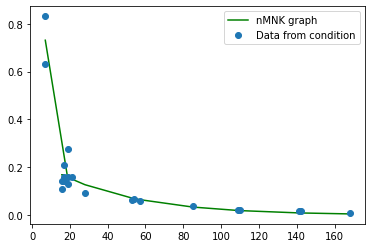

In [112]:
def fun1(t,c1,c2, a1,a2):
    return c1*np.exp(-t/a1) + c2*np.exp(-t/a2)
#предполагаемые начальные значения коэфициентов для следующей апроксимации
coefs = [1, 1, 1, 1]
#массив результатов получается в итоге подставления t[i] в полученную функцию
t2 = np.empty (21,  dtype=np.float)
# первый параметр есть функция, дальше - исходные данные, потом набор начальных значений, лимит на кол-во исчислений
c, _ = curve_fit(fun1, t, Lt, coefs, maxfev = 5000)
#подставления t[i] в полученную функцию
for i in range(0, 21):
   t2[i] = fun1(t[i], c[0], c[1], c[2], c[3])
#смотрим разницу между исходними данными и полученым значением
err = np.array (Lt - t2)
for i in range (0,21):
#берем квадрат разницы, что бы не влиял знак
   err[i] = err[i]**2
   SumErr = sum(err)/21
#вывод ошибки
print("Результирующая суммарная ошибка модели = ",SumErr)
#рисуем график
plt.plot(t, t2, "g", label='nMNK graph')
plt.plot(t, Lt, "o", label='Data from condition')
plt.legend()
pass

В итоге, после нескольких экспериментов мы распологаем следующими данными:

([предполагаемые начальные коэфициенты] = ошибка модели)


$[1, 1, 1, 1] = 0.002039042965355133$

$[2, 2, 2, 2] = 0.0020390429227926344$

$[2.1, 2.1, 2.1, 2.1] = 0.0020390430766769664$

$[2.5, 2, 2, 2] = 0.0020390429896489847$

$[4.3, 10, 3, 2] = 0.002039043010094379$

$[4, 10, 3, 2.5] = 0.002039042920514795$

$[4, 10, 3, 10] = 0.0020390430074989467$

$[7, 5, 3, 10] = 0.00203904298309105$

$[7.3, 5.3, 3.3, 10.3] = 0.0020390429926196657$

$[0.03, 0.004, 0.5, 1] = 0.0020390429924264145$

# Выводы
Что же можно сказать в заключение? Мы смогли просчитать результирующую суммарную ошибку (РСО) при проведении аппроксимации исходных данных. Исходя из полученных результатов, мы понимаем, что РСО не чувствительна к предполагаемым начальным значениям, т.к. различия в полученных значениях начинаются с 10-ой (один раз с 9-ой) цифры после запятой.